## 2) Feature Selection&Transformation

### Import

In [1]:
import pandas as pd

# Feature Transformation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

# visualize
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# ignore warnings
import warnings ; warnings.filterwarnings('ignore')

### Read Data

In [ ]:
feature_train = pd.read_csv('../data/feature/feature_train.csv')
feature_test = pd.read_csv('../data/feature/feature_test.csv')

### Feature Selection
- Ensemble을 고려해 모델 간 상관성이 적도록 상이한 두 Feature set을 만든다.
- 선택한 Feature는 모델에 input해보며 결정했다.

In [ ]:
feature_train_1, feature_test_1 = feature_train.copy(), feature_test.copy()
feature_train_2, feature_test_2 = feature_train.copy(), feature_test.copy()

In [ ]:
set1 = ['id','day_of_week', 'base_hour', 'maximum_speed_limit', 'road_type', 'start_node_label', 'edge_label', 'base_month', 'harversine',
        'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude','pca_lat', 'pca_long','end_turn_restricted', 
        'rr_target', 'hour_target','dow_target', 'end_node_target', 'coor_target', 'edge_target','dow_std', 'end_frequency']
feature_train_1 = feature_train_1[set1+['target']]
feature_test_1 = feature_test_1[set1]

In [ ]:
set2 = ['id','day_of_week', 'base_hour', 'maximum_speed_limit', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude',
        'end_turn_restricted', 'start_cluster', 'end_cluster','start_node_label', 'end_node_label', 'edge_label', 'coor_label',
        'base_month', 'pca1', 'pca2', 'bearing', 'rn_target', 'hour_target','msl_target', 'start_node_target', 'coor_target', 
        'dow_std', 'rr_std','coor_std', 'edge_frequency']
feature_train_2 = feature_train_2[set2+['target']]
feature_test_2 = feature_test_2[set2]

### Feature Transformation

#### $\bullet$ Categorical Encoding

In [ ]:
cat1_encode = ['maximum_speed_limit','road_type', 'start_node_label', 'edge_label'] 
cat1_uncode = ['day_of_week', 'end_turn_restricted']

In [ ]:
# encode에 'start_cluster', 'end_cluster' 추가함
cat2_encode = ['maximum_speed_limit','start_node_label','end_node_label', 'edge_label','coor_label', 'start_cluster', 'end_cluster'] 
cat2_uncode = ['day_of_week', 'end_turn_restricted']

In [38]:
for i in cat1_uncode:
    le = LabelEncoder()
    le = le.fit(feature_train_1[i])
    feature_train_1[i]=le.transform(feature_train_1[i])
    
    for label in np.unique(feature_test_1[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    feature_test_1[i] = le.transform(feature_test_1[i])

In [38]:
for i in cat2_uncode:
    le = LabelEncoder()
    le = le.fit(feature_train_2[i])
    feature_train_2[i]=le.transform(feature_train_2[i])
    
    for label in np.unique(feature_test_2[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    feature_test_2[i] = le.transform(feature_test_2[i])

#### $\bullet$ Scaler&Transformer
- 수치형 변수의 분포를 보고 오른쪽 꼬리가 긴 분포가 많음을 확인해 PowerTransformer를 사용한다.

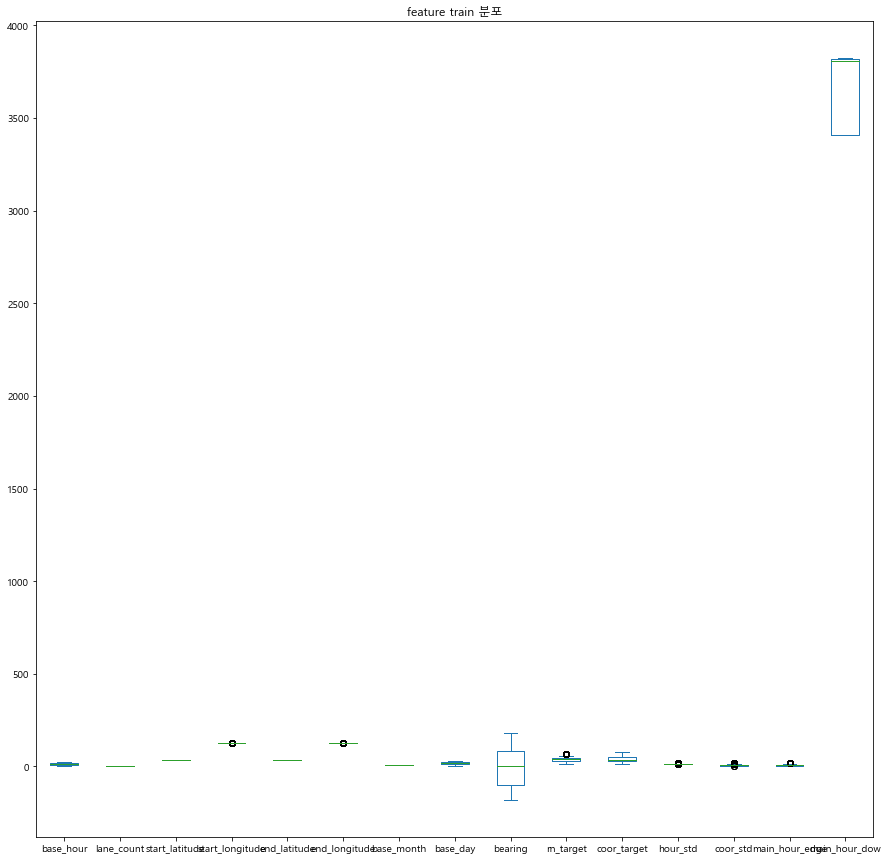

In [39]:
num1 = [i for i in feature_train_1.columns if i not in cat1_uncode+cat1_encode+['id','target']]

feature_train_1[num1].plot.box(title="feature train 1 분포", figsize=(7,7))
plt.show()

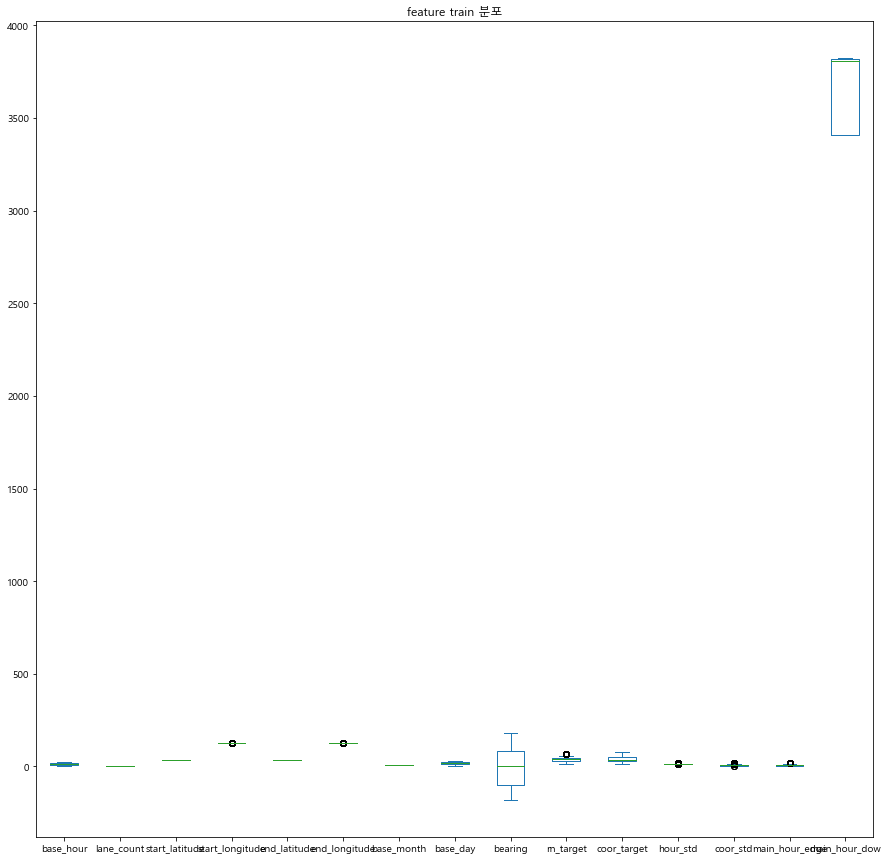

In [39]:
num2 = [i for i in feature_train_2.columns if i not in cat2_uncode+cat2_encode+['id','target']]

feature_train_2[num2].plot.box(title="feature train 2 분포", figsize=(7,7))
plt.show()

In [40]:
# power, normalizer, robust 등 시도
scaler = PowerTransformer()
feature_train_1[num1] = scaler.fit_transform(feature_train_1[num1])
feature_test_1[num1] = scaler.transform(feature_test_1[num1])

In [40]:
# power, normalizer, robust 등 시도
scaler = PowerTransformer()
feature_train_2[num2] = scaler.fit_transform(feature_train_2[num2])
feature_test_2[num2] = scaler.transform(feature_test_2[num2])

### Save Data

In [41]:
feature_train_1.to_csv('../data/feature/FeatureSet1_train.csv', index=False)
feature_test_1.to_csv('../data/feature/FeatureSet1_test.csv', index=False)

In [41]:
feature_train_2.to_csv('../data/feature/FeatureSet2_train.csv', index=False)
feature_test_2.to_csv('../data/feature/FeatureSet2_test.csv', index=False)